## Balanced Random Forest Classifier

This notebook is used to train a balanced random forest classifier on the data set of the third day. The goal is to see if the model can be improved by using an ensemble method. More specifically, bagging method.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from imblearn.ensemble import BalancedRandomForestClassifier

import sys
sys.path.append('../Library')

import breedManip as breedManip
import dataProcessing as dataProcessing
import breeds as breeds
import splitData as splitData

import importlib
importlib.reload(splitData)

<module 'splitData' from '/mnt/remote/workspaces/magali.egger/TBproject/Travail_Bachelor/ClassificationSimple/../Library/splitData.py'>

#### Preparation of the data

In [5]:
# get the df_train and df_test with pickle
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)

In [6]:
len(df_test['mouse'].unique())

39

In [7]:
df_train = df_train.drop(columns=['mouse'])
df_test = df_test.drop(columns=['mouse'])

df_train = df_train.drop(columns=['breed'])
df_test = df_test.drop(columns=['breed'])

In [8]:
x_train, x_test, y_train, y_test, le = splitData.encode_scale_data(df_train, df_test, 13, cat_matrix=True)

#### Training of the balanced random forest model

In [9]:
clf = BalancedRandomForestClassifier(random_state=13, n_jobs=-1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

/home/magali.egger/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/home/magali.egger/miniconda3/lib/python3.10/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/magali.egger/miniconda3/lib/python3.10/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/magali.egger/miniconda3/lib/python3.10/site

In [14]:
with open('/home/magali.egger/workspace/TBproject/Travail_Bachelor/Data/rfc_balanced_forest.pkl', 'wb') as f:
    pickle.dump(clf, f)

[[269899   8850   2888]
 [  2792  36433    602]
 [ 22958   8078 410204]]
              precision    recall  f1-score   support

           n       0.91      0.96      0.94    281637
           r       0.68      0.91      0.78     39827
           w       0.99      0.93      0.96    441240

    accuracy                           0.94    762704
   macro avg       0.86      0.93      0.89    762704
weighted avg       0.95      0.94      0.94    762704



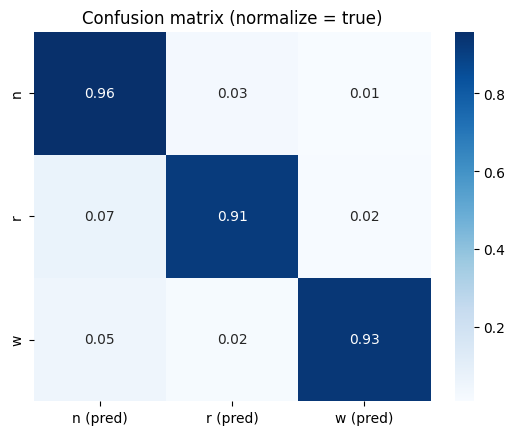

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
pred = np.argmax(y_pred, axis=1)
test = np.argmax(y_test, axis=1)

# plot the confusion matrix between predictions of the model and real values

cm = np.array(confusion_matrix(test, pred))
print(cm)

cm = np.array(confusion_matrix(test, pred, normalize='true')) # normalize = 'true' or 'pred'
confusion = pd.DataFrame(cm, index=le.classes_, columns=le.classes_ + ' (pred)')

print(classification_report(test, pred, target_names=le.classes_, zero_division=0))

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='.2f')
plt.title(f'Confusion matrix (normalize = true)')
plt.show()